# Importing libraries

In [2]:
import os
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from global_land_mask import is_land
from scipy.io import netcdf

In [3]:
DATA_FILE_DIR = './min_temp_0.2/'

START_YEAR, END_YEAR = 2011, 2020

NUM_OF_YEARS = END_YEAR - START_YEAR

NUM_OF_MONTHS = 12

NUM_OF_DAYS = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31,}

LAT = 880

LON = 1760

A function that opens netCDF file and read temperature variable and get the minimum temperature

In [15]:
def get_min_tmp(filename):
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('./min_temp_0.2/')
    filename = filename[:-4]
    print(filename)
    file = netcdf.netcdf_file(filename, mmap=False)
    tmp = file.variables['T_MIN_L103_Pd'].data.copy()
    min_tmp = np.ndarray(tmp.shape[1:])

    for i in range(tmp.shape[1]):
        for j in range(tmp.shape[2]):
            min_tmp[i, j] = min(tmp[0, i, j], tmp[1, i, j], tmp[2, i, j], tmp[3, i, j])
    
    file.close()
    os.remove(filename)
    return min_tmp

Read 9 years of temperature data and take the average/minimum  
e.g. date '0417' min_tmp = 20110417_min_tmp + 20130417_min_tmp + ... + 2019_min_tmp

In [16]:
yearly_date_avg = {}
yearly_date_min = {}
for month in range(1, NUM_OF_MONTHS+1, 1):
    for day in range(1, NUM_OF_DAYS[month]+1, 1):
        date_tmps = np.zeros((NUM_OF_YEARS, LAT, LON))
        
        if month < 4: # if month<4, data is from 2012 to 2020
            for year in range(START_YEAR+1, END_YEAR+1):
                filename = DATA_FILE_DIR + 'cdas1.{}{:02d}{:02d}.sfluxgrbf.grb2.nc.zip'.format(year, month, day)
                assert os.path.isfile(filename), "File Not Found: '{}'".format(filename)
                date_tmps[year-START_YEAR-1] = get_min_tmp(filename)
        else: # if month>=4, data are from 2011 to 2019
            for year in range(START_YEAR, END_YEAR):
                filename = DATA_FILE_DIR + 'cdas1.{}{:02d}{:02d}.sfluxgrbf.grb2.nc.zip'.format(year, month, day)
                assert os.path.isfile(filename), "File Not Found: '{}'".format(filename)
                date_tmps[year-START_YEAR] = get_min_tmp(filename)
        
        yearly_date_avg['{:02d}{:02d}'.format(month, day)] = date_tmps.mean(axis=0)
        yearly_date_min['{:02d}{:02d}'.format(month, day)] = date_tmps.min(axis=0)

./min_temp_0.2/cdas1.20120101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20200101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20200102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120103.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130103.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140103.sfluxgrbf.

./min_temp_0.2/cdas1.20120120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20200120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20200121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120122.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130122.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140122.sfluxgrbf.

./min_temp_0.2/cdas1.20120208.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130208.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140208.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150208.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160208.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170208.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180208.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190208.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20200208.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20200209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120210.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130210.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140210.sfluxgrbf.

./min_temp_0.2/cdas1.20120227.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130227.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140227.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150227.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160227.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170227.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180227.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190227.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20200227.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20200228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120301.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130301.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140301.sfluxgrbf.

./min_temp_0.2/cdas1.20120318.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130318.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140318.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150318.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160318.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170318.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180318.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190318.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20200318.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120319.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130319.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140319.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150319.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160319.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170319.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180319.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190319.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20200319.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120320.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130320.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140320.sfluxgrbf.

./min_temp_0.2/cdas1.20110406.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120406.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130406.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140406.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150406.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160406.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170406.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180406.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190406.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110407.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120407.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130407.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140407.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150407.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160407.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170407.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180407.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190407.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110408.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120408.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130408.sfluxgrbf.

./min_temp_0.2/cdas1.20110425.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120425.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130425.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140425.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150425.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160425.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170425.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180425.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190425.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110426.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120426.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130426.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140426.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150426.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160426.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170426.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180426.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190426.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110427.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120427.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130427.sfluxgrbf.

./min_temp_0.2/cdas1.20110514.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120514.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130514.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140514.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150514.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160514.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170514.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180514.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190514.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110515.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120515.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130515.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140515.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150515.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160515.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170515.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180515.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190515.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110516.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120516.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130516.sfluxgrbf.

./min_temp_0.2/cdas1.20110602.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120602.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130602.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140602.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150602.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160602.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170602.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180602.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190602.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110603.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120603.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130603.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140603.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150603.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160603.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170603.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180603.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190603.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110604.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120604.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130604.sfluxgrbf.

./min_temp_0.2/cdas1.20110621.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120621.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130621.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140621.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150621.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160621.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170621.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180621.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190621.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110622.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120622.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130622.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140622.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150622.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160622.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170622.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180622.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190622.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110623.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120623.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130623.sfluxgrbf.

./min_temp_0.2/cdas1.20110710.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120710.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130710.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140710.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150710.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160710.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170710.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180710.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190710.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110711.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120711.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130711.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140711.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150711.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160711.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170711.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180711.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190711.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110712.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120712.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130712.sfluxgrbf.

./min_temp_0.2/cdas1.20110729.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120729.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130729.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140729.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150729.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160729.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170729.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180729.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190729.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110730.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120730.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130730.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140730.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150730.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160730.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170730.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180730.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190730.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110731.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120731.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130731.sfluxgrbf.

./min_temp_0.2/cdas1.20110817.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120817.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130817.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140817.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150817.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160817.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170817.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180817.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190817.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110818.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120818.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130818.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140818.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150818.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160818.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170818.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180818.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190818.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110819.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120819.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130819.sfluxgrbf.

./min_temp_0.2/cdas1.20110905.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120905.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130905.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140905.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150905.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160905.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170905.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180905.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190905.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110906.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120906.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130906.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140906.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150906.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160906.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170906.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180906.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190906.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110907.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120907.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130907.sfluxgrbf.

./min_temp_0.2/cdas1.20110924.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120924.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130924.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140924.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150924.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160924.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170924.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180924.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190924.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110925.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120925.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130925.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20140925.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20150925.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20160925.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20170925.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20180925.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20190925.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20110926.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20120926.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20130926.sfluxgrbf.

./min_temp_0.2/cdas1.20111013.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121013.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131013.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20141013.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20151013.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20161013.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20171013.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20181013.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20191013.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20111014.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121014.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131014.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20141014.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20151014.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20161014.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20171014.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20181014.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20191014.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20111015.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121015.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131015.sfluxgrbf.

./min_temp_0.2/cdas1.20111101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20141101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20151101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20161101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20171101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20181101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20191101.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20111102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20141102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20151102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20161102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20171102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20181102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20191102.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20111103.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121103.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131103.sfluxgrbf.

./min_temp_0.2/cdas1.20111120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20141120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20151120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20161120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20171120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20181120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20191120.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20111121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20141121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20151121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20161121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20171121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20181121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20191121.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20111122.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121122.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131122.sfluxgrbf.

./min_temp_0.2/cdas1.20111209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20141209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20151209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20161209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20171209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20181209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20191209.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20111210.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121210.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131210.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20141210.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20151210.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20161210.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20171210.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20181210.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20191210.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20111211.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121211.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131211.sfluxgrbf.

./min_temp_0.2/cdas1.20111228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20141228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20151228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20161228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20171228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20181228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20191228.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20111229.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121229.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131229.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20141229.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20151229.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20161229.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20171229.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20181229.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20191229.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20111230.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20121230.sfluxgrbf.grb2.nc
./min_temp_0.2/cdas1.20131230.sfluxgrbf.

First add location columns--lat and lon  

In [17]:
filename = DATA_FILE_DIR + 'cdas1.20191231.sfluxgrbf.grb2.nc.zip'
with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('./min_temp_0.2/')
file = netcdf.netcdf_file(filename[:-4], mmap=False)
lat = file.variables['lat'].data.copy()
lon = file.variables['lon'].data.copy()
file.close()

Generate a mask for land only

In [19]:
mask = np.ndarray((LAT, LON))
for i in range(LAT):
    mask[i] = is_land(lat[i], ((lon + 180) % 360) - 180) # need to convert 0-360 degree to -180-180 degree for computing

mask = mask.astype(bool)

Text(0, 0.5, 'Latitude')

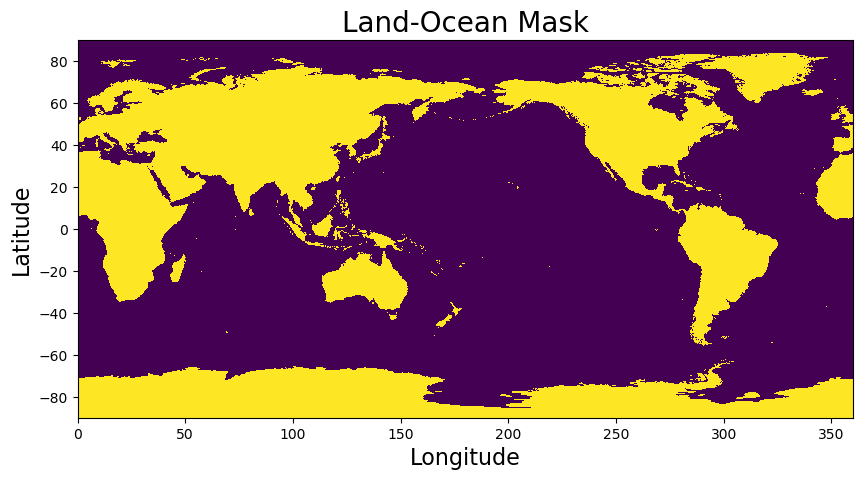

In [20]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
heatmap = ax.pcolormesh(lon, lat, mask)
ax.set_title('Land-Ocean Mask', size=20)
ax.set_xlabel('Longitude', size=16)
ax.set_ylabel('Latitude', size=16)

Then add minimum temperature for each date iteratively  
After that, save to 365 files

In [21]:
os.makedirs('./processed_0.2', exist_ok=True)
for month in range(1, NUM_OF_MONTHS+1, 1):
    for day in range(1, NUM_OF_DAYS[month]+1, 1):
        date = '{:02d}{:02d}'.format(month, day)
        masked_tmp = np.ma.masked_where(mask==False, yearly_date_avg[date])
        pd.DataFrame(masked_tmp).to_csv('./processed_0.2/{}.csv'.format(date))

Also save lat and lon

In [22]:
pd.DataFrame(lat).to_csv('./processed_0.2/lat.csv')
pd.DataFrame(lon).to_csv('./processed_0.2/lon.csv')